In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pyts.datasets import load_basic_motions
from sktime.datasets import (
    load_arrow_head,
    load_basic_motions
)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans

import warnings
warnings.filterwarnings("ignore")


### Arrow Head dataset

In [2]:
arrow_X, arrow_y = load_arrow_head(return_type="numpy3d")
arrow_X = np.reshape(arrow_X, (arrow_X.shape[0],arrow_X.shape[1]*arrow_X.shape[2]))
arrow_X.shape

(211, 251)

### k-means

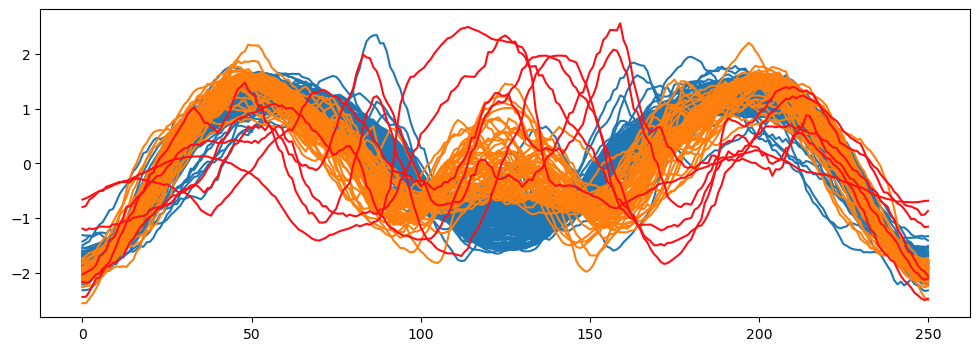

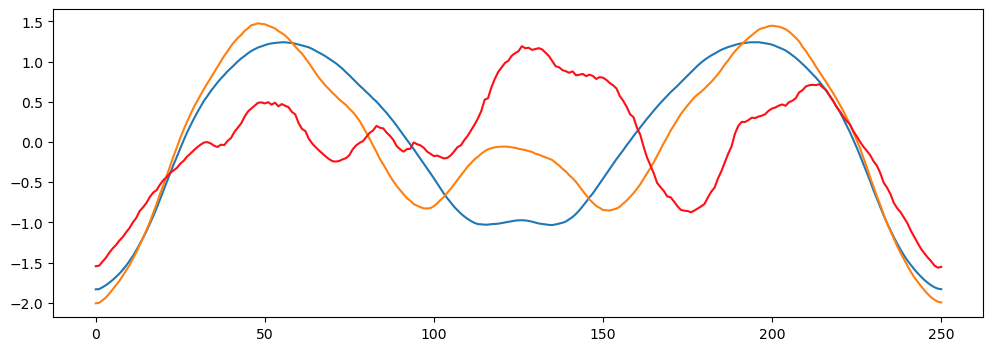

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(arrow_X)
labels = kmeans.predict(arrow_X)

plt.figure(figsize=(12, 4))
plt.plot(arrow_X[labels == 0, :].T, '#1F77B4')
plt.plot(arrow_X[labels == 1, :].T, '#FF7F0E')
plt.plot(arrow_X[labels == 2, :].T, '#ff0e16')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.plot(kmeans.cluster_centers_[2, :].T, '#ff0e16')
plt.show()

### dba-k-means

In [4]:
t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=3, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(arrow_X)
print(time.time() - t)

201.95368313789368


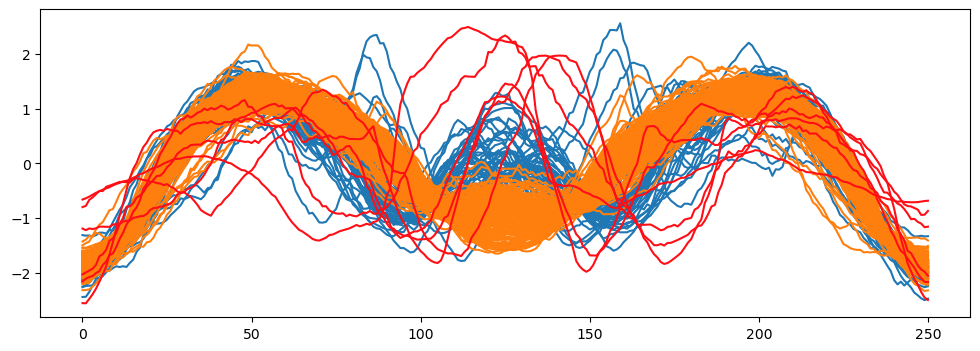

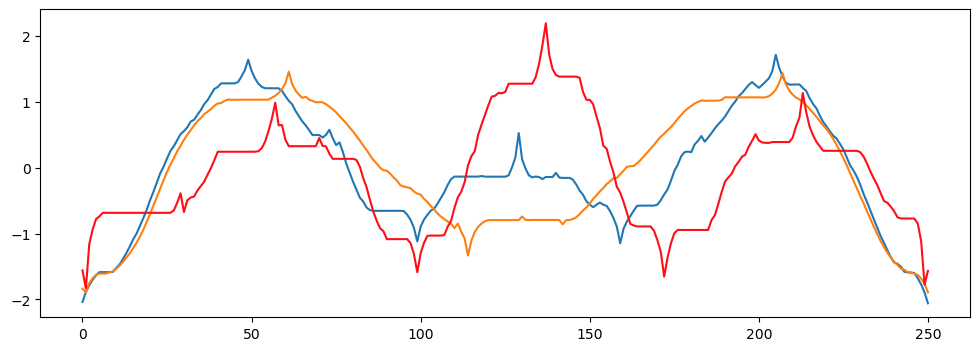

In [5]:
labels = tskmeans.predict(arrow_X)

plt.figure(figsize=(12, 4))
plt.plot(arrow_X[labels == 0, :].T, '#1F77B4')
plt.plot(arrow_X[labels == 1, :].T, '#FF7F0E')
plt.plot(arrow_X[labels == 2, :].T, '#ff0e16')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.plot(tskmeans.cluster_centers_[2, :, 0].T, '#ff0e16')
plt.show()

## Basic Motions dataset

In [6]:
motions_X, motions_y = load_basic_motions(return_type="numpy3d")
print(motions_X.shape)
motions_X = np.reshape(motions_X, (motions_X.shape[0]*motions_X.shape[1], motions_X.shape[2]))
motions_X.shape

(80, 6, 100)


(480, 100)

### k-means

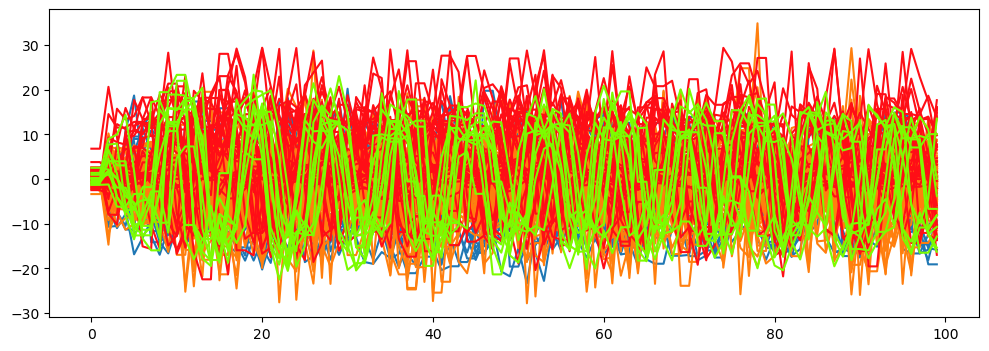

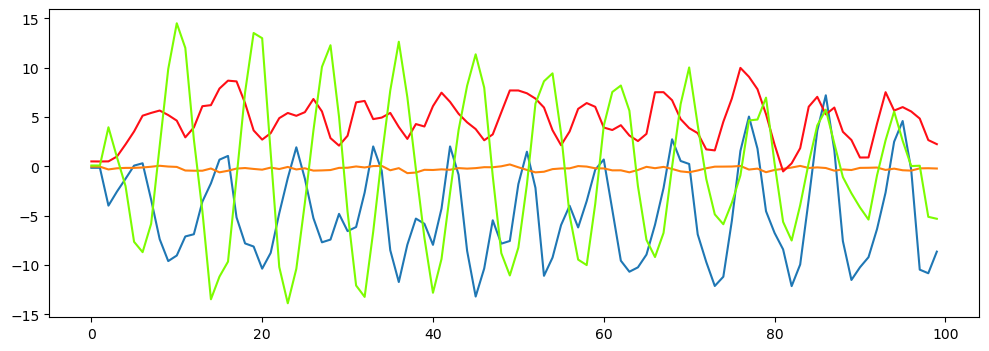

In [8]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(motions_X)
labels = kmeans.predict(motions_X)

plt.figure(figsize=(12, 4))
plt.plot(motions_X[labels == 0, :].T, '#1F77B4')
plt.plot(motions_X[labels == 1, :].T, '#FF7F0E')
plt.plot(motions_X[labels == 2, :].T, '#ff0e16')
plt.plot(motions_X[labels == 3, :].T, '#7CFC00')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.plot(kmeans.cluster_centers_[2, :].T, '#ff0e16')
plt.plot(kmeans.cluster_centers_[3, :].T, '#7CFC00')
plt.show()

### dba-k-means

In [9]:
t = time.time()
tskmeans = TimeSeriesKMeans(n_clusters=4, metric='dtw', max_iter_barycenter=100, n_init=5)
tskmeans.fit(motions_X)
print(time.time() - t)

99.16250514984131


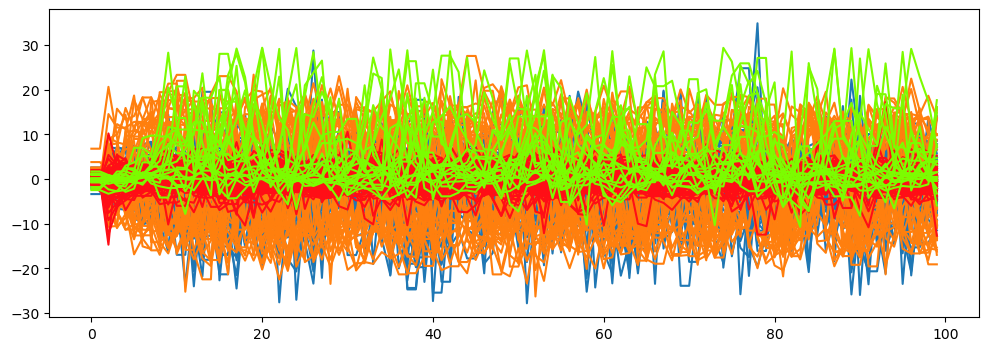

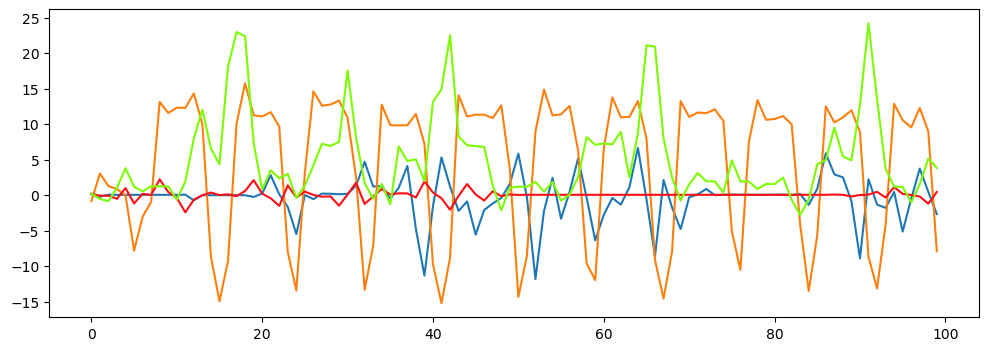

In [126]:
labels = tskmeans.predict(motions_X)

plt.figure(figsize=(12, 4))
plt.plot(motions_X[labels == 0, :].T, '#1F77B4')
plt.plot(motions_X[labels == 1, :].T, '#FF7F0E')
plt.plot(motions_X[labels == 2, :].T, '#ff0e16')
plt.plot(motions_X[labels == 3, :].T, '#7CFC00')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(tskmeans.cluster_centers_[0, :, 0].T, '#1F77B4')
plt.plot(tskmeans.cluster_centers_[1, :, 0].T, '#FF7F0E')
plt.plot(tskmeans.cluster_centers_[2, :, 0].T, '#ff0e16')
plt.plot(tskmeans.cluster_centers_[3, :, 0].T, '#7CFC00')
plt.show()